<a href="https://colab.research.google.com/github/bcdanl/210-class-notes/blob/main/danl_210_note_19_2024_0411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# Below is for an interactive display of DataFrame in Colab
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
flights = pd.read_csv("https://bcdanl.github.io/data/flights.zip")
airlines = pd.read_csv("https://bcdanl.github.io/data/airlines.csv")
airports = pd.read_csv("https://bcdanl.github.io/data/airports.csv")
planes = pd.read_csv("https://bcdanl.github.io/data/planes.csv")
weather = pd.read_csv("https://bcdanl.github.io/data/weather.csv")

In [6]:
flights.sort_values('dep_delay', ascending = False).head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09T14:00:00Z
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15T23:00:00Z
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10T21:00:00Z
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20T22:00:00Z
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22T20:00:00Z
173992,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,DL,2391,N959DL,JFK,TPA,139.0,1005,19,0,2013-04-10T23:00:00Z
151974,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,DL,2119,N927DA,LGA,MSP,167.0,1020,8,10,2013-03-17T12:00:00Z
247040,2013,6,27,959.0,1900,899.0,1236.0,2226,850.0,DL,2007,N3762Y,JFK,PDX,313.0,2454,19,0,2013-06-27T23:00:00Z
270987,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,DL,2047,N6716C,LGA,ATL,109.0,762,7,59,2013-07-22T11:00:00Z
87238,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,AA,172,N5DMAA,EWR,MIA,149.0,1085,17,0,2013-12-05T22:00:00Z


In [7]:
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


# Classwork 9

## Question 5
Find the airline that has the largest proportion of flights with longer than 30-minute dep_delay.



In [ ]:
# the number of flights for each airline
# the number of flights with 30-minute or longer delay for each airline
# proportion =  (the number of flights with 30-minute or longer delay for each airline) / (the number of flights for each airline)

In [8]:
import numpy as np

delay_long = (
    flights
    .merge(airlines, on = 'carrier', how = 'left')
    .assign(
        delay30 = lambda df: np.where( df['dep_delay'] > 30, 1, 0 )
    )
    .groupby('name')
    .agg(
        n_flighs = ('name', 'size'),
        n_delay = ('delay30', 'sum')
    )
    .assign(
        prop = lambda df: df['n_delay'] / df['n_flighs']
    )
    .sort_values('prop', ascending = False)
)

delay_long

,n_flighs,n_delay,prop
name,,,
ExpressJet Airlines Inc.,54173,11655,0.215144
Mesa Airlines Inc.,601,115,0.191348
Frontier Airlines Inc.,685,130,0.189781
Endeavor Air Inc.,18460,3257,0.176436
AirTran Airways Corporation,3260,547,0.167791
Southwest Airlines Co.,12275,2030,0.165377
SkyWest Airlines Inc.,32,5,0.156250
JetBlue Airways,54635,8411,0.153949
Envoy Air,26397,3730,0.141304


# Classwork 9 - Part 3


In [10]:
student_data1 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'],
        'marks': [200, 210, 190, 222, 199]})

student_data2 = pd.DataFrame({
        'student_id': ['S4', 'S5', 'S6', 'S7', 'S8'],
        'name': ['Scarlette Fisher', 'Carla Williamson', 'Dante Morse', 'Kaiser William', 'Madeeha Preston'],
        'marks': [201, 200, 198, 219, 201]})

In [11]:
student_data1

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199


In [12]:
student_data2

,student_id,name,marks
0,S4,Scarlette Fisher,201
1,S5,Carla Williamson,200
2,S6,Dante Morse,198
3,S7,Kaiser William,219
4,S8,Madeeha Preston,201


## Question 6
Write a Pandas code to join the two given DataFrames along rows and assign all data.


In [15]:
df_rowwise = pd.concat([student_data1, student_data2])

df_rowwise

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199
0,S4,Scarlette Fisher,201
1,S5,Carla Williamson,200
2,S6,Dante Morse,198
3,S7,Kaiser William,219
4,S8,Madeeha Preston,201


## Question 7
Write a Pandas code to join the two given DataFrames along columns and assign all data.


In [16]:
df_columwise = pd.concat([student_data1, student_data2], axis = "columns")

df_columwise

,student_id,name,marks,student_id,name,marks
0,S1,Danniella Fenton,200,S4,Scarlette Fisher,201
1,S2,Ryder Storey,210,S5,Carla Williamson,200
2,S3,Bryce Jensen,190,S6,Dante Morse,198
3,S4,Ed Bernal,222,S7,Kaiser William,219
4,S5,Kwame Morin,199,S8,Madeeha Preston,201


## Question 8
Consider the following Pandas Series:


In [13]:
s6 = pd.Series(['S6', 'Scarlette Fisher', 205], index=['student_id', 'name', 'marks'])

In [14]:
s6

student_id                  S6
name          Scarlette Fisher
marks                      205
dtype: object

Write a Pandas code to append a row to the DataFrame student_data1.



In [17]:
df_append_row = pd.concat([student_data1, s6])

df_append_row

,student_id,name,marks,0
0,S1,Danniella Fenton,200.0,NaN
1,S2,Ryder Storey,210.0,NaN
2,S3,Bryce Jensen,190.0,NaN
3,S4,Ed Bernal,222.0,NaN
4,S5,Kwame Morin,199.0,NaN
student_id,NaN,NaN,NaN,S6
name,NaN,NaN,NaN,Scarlette Fisher
marks,NaN,NaN,NaN,205


In [18]:
df_append_col = pd.concat([student_data1, s6], axis = 1)

df_append_col

,student_id,name,marks,0
0,S1,Danniella Fenton,200.0,NaN
1,S2,Ryder Storey,210.0,NaN
2,S3,Bryce Jensen,190.0,NaN
3,S4,Ed Bernal,222.0,NaN
4,S5,Kwame Morin,199.0,NaN
student_id,NaN,NaN,NaN,S6
name,NaN,NaN,NaN,Scarlette Fisher
marks,NaN,NaN,NaN,205


In [19]:
df_s6 = pd.DataFrame(s6)
df_s6

,0
student_id,S6
name,Scarlette Fisher
marks,205


In [21]:
df_append_row = pd.concat([student_data1, df_s6])
df_append_row

,student_id,name,marks,0
0,S1,Danniella Fenton,200.0,NaN
1,S2,Ryder Storey,210.0,NaN
2,S3,Bryce Jensen,190.0,NaN
3,S4,Ed Bernal,222.0,NaN
4,S5,Kwame Morin,199.0,NaN
student_id,NaN,NaN,NaN,S6
name,NaN,NaN,NaN,Scarlette Fisher
marks,NaN,NaN,NaN,205


In [22]:
df_s6.T

,student_id,name,marks
0,S6,Scarlette Fisher,205


In [25]:
df_append_row_finally = pd.concat([student_data1, df_s6.T]).reset_index(drop = True)
df_append_row_finally

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199
5,S6,Scarlette Fisher,205


# Data Viz

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
!pip install lets-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 15.7 MB/s eta 0:00:00


In [28]:
from lets_plot import *
LetsPlot.setup_html()

In [29]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [30]:
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

In [31]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [38]:
titanic['survived'].unique()

array([0, 1])

In [32]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Bar

<Axes: xlabel='sex', ylabel='count'>

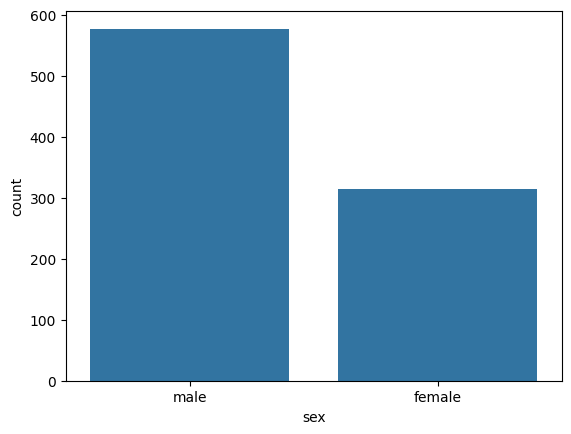

In [34]:
sns.countplot(data = titanic,
              x = 'sex')

<Axes: xlabel='count', ylabel='sex'>

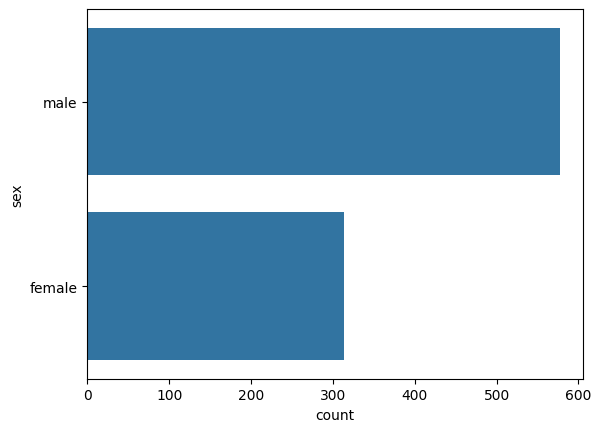

In [35]:
sns.countplot(data = titanic,
              y = 'sex')

<Axes: xlabel='fare', ylabel='count'>

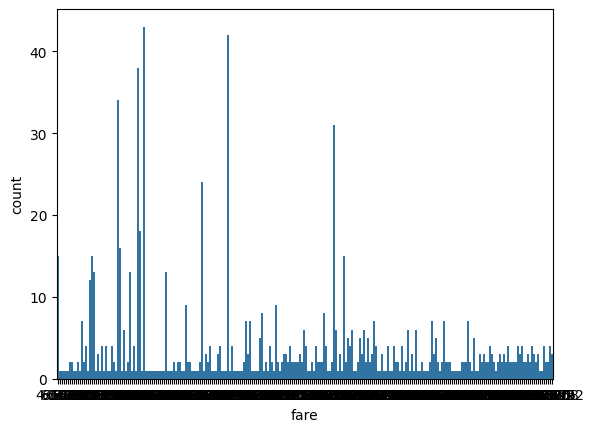

In [36]:
sns.countplot(data = titanic,
              x = 'fare')

<Axes: xlabel='fare', ylabel='Count'>

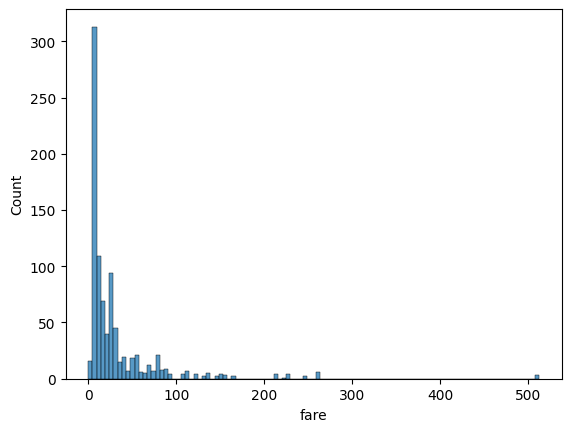

In [37]:
sns.histplot(data = titanic,
              x = 'fare')

<Axes: xlabel='sex', ylabel='count'>

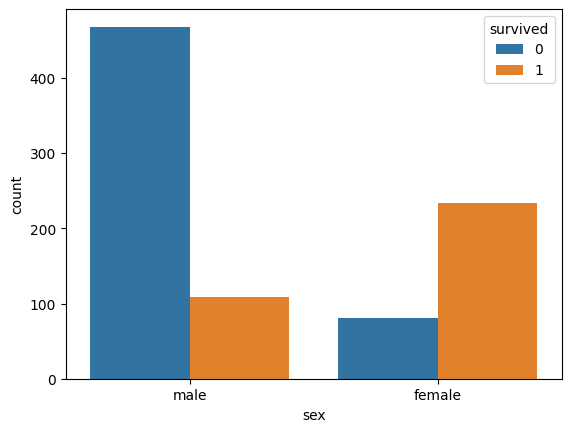

In [39]:
sns.countplot(data = titanic,
              x = 'sex',
              hue = 'survived')

# Histogram

<Axes: xlabel='age', ylabel='Count'>

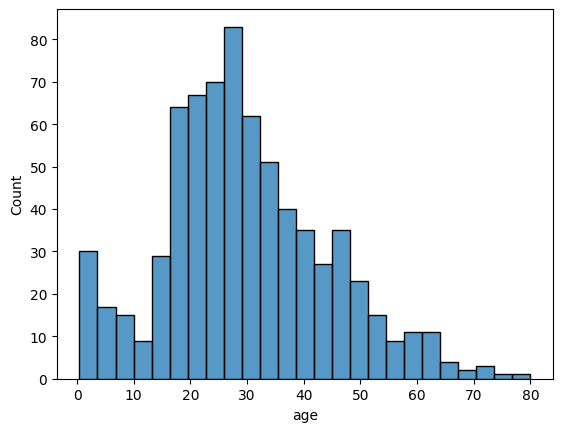

In [41]:
sns.histplot(data = titanic,
             x =  'age',
             bins = 25) # histogram is really sensitive to the number of bins

<Axes: xlabel='age', ylabel='Count'>

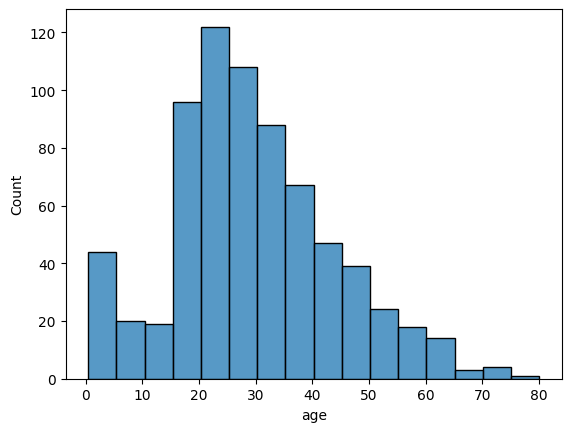

In [42]:
sns.histplot(data = titanic,
             x =  'age',
             binwidth = 5)

<Axes: xlabel='total_bill'>

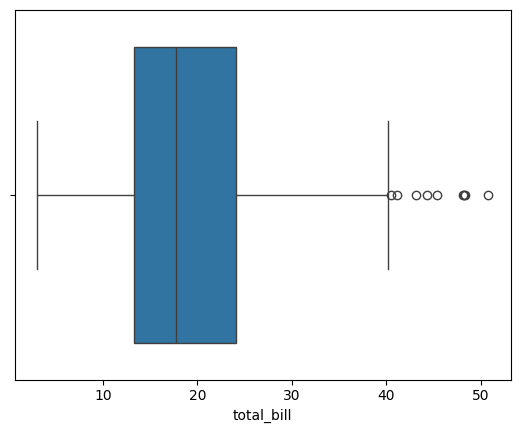

In [44]:
sns.boxplot(data = tips,
            x = 'total_bill')

In [46]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

<Axes: xlabel='time', ylabel='total_bill'>

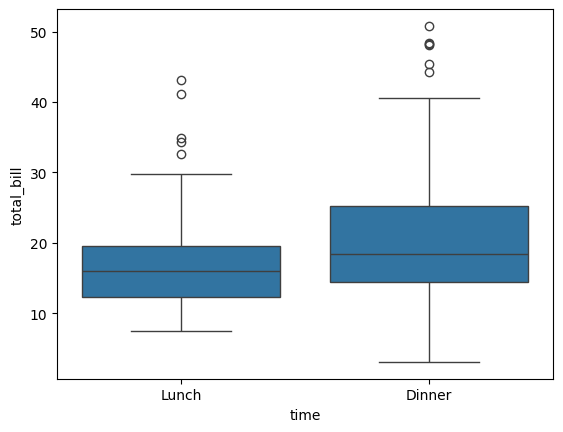

In [47]:
sns.boxplot(data = tips,
            x = 'time',
            y = 'total_bill')

In [48]:
plt.style.use('ggplot')

<Axes: xlabel='time', ylabel='total_bill'>

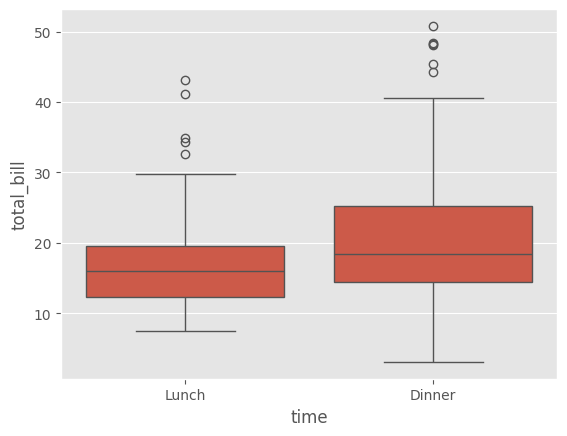

In [49]:
sns.boxplot(data = tips,
            x = 'time',
            y = 'total_bill')